# Linear Regression 

In [1]:
import pandas as pd #### used for dataframe manipulations
import numpy as np
import seaborn as sns ### plotting
import matplotlib.pyplot as plt ### plotting

In [2]:
##### Given the characteristics about the loan and the loan applicant build a model to predict the interest rate that the bank 
##### should charge the person


In [3]:
train_file= r"C:\Users\91973\OneDrive\Desktop\Stats & ML by Anil\Data\loan_data_train.csv"
test_file= r"C:\Users\91973\OneDrive\Desktop\Stats & ML by Anil\Data\loan_data_test.csv"

ld_train=pd.read_csv(train_file)
ld_test=pd.read_csv(test_file)  


In [72]:
from copy import deepcopy

ld_train_demo = deepcopy(ld_train)
ld_test_demo = deepcopy(ld_test)

In [7]:
#### Objective: Given the features about the applicant and the loan itself can we predict the rate of interest for the loan 
#### objective : Supervised machine learning algorithm, regression problem -- Linear Regression
ld_train.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [8]:
ld_test.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20093,5000,5000,60 months,moving,12.59%,NY,RENT,4416.67,690-694,13,7686,0,< 1 year
1,62445,18000,18000,60 months,debt_consolidation,4.93%,CA,RENT,5258.50,710-714,6,11596,0,10+ years
2,65248,7200,7200,60 months,debt_consolidation,25.16%,LA,MORTGAGE,3750.00,750-754,13,7283,0,6 years
3,81822,7200,7200,36 months,debt_consolidation,17.27%,NY,MORTGAGE,3416.67,790-794,14,4838,0,10+ years
4,57923,22000,22000,60 months,debt_consolidation,18.28%,MI,MORTGAGE,6083.33,720-724,9,20181,0,8 years


In [9]:
#### Sanity check ####

### 1. Check for logical dependency - True
### 2. Check for data adequacy - False (neglect)

ld_train.shape, ld_test.shape

((2200, 15), (300, 14))

In [96]:
# ld_train_demo['Amount.Funded.By.Investors'].unique()
get_non_numeric(ld_train_demo['Amount.Funded.By.Investors'])

[]

In [95]:
ld_train_demo['Amount.Funded.By.Investors'] = pd.to_numeric(ld_train_demo['Amount.Funded.By.Investors'], errors = 'coerce')


In [99]:
ld_train_demo['FICO.Range'].unique()

array(['720-724', '710-714', '690-694', '730-734', '785-789', '665-669',
       '735-739', '740-744', '765-769', '800-804', '680-684', '745-749',
       '660-664', '670-674', '705-709', '695-699', '715-719', '760-764',
       '685-689', '755-759', '675-679', '775-779', '725-729', '640-644',
       '790-794', '770-774', '700-704', '750-754', '805-809', '810-814',
       '815-819', '780-784', '820-824', '795-799', '645-649', '655-659',
       '830-834', '650-654'], dtype=object)

In [98]:
ld_train_demo['Amount.Funded.By.Investors'].astype(float)

0       25000.00
1       19750.00
2        2100.00
3       28000.00
4       17431.82
          ...   
2195    30000.00
2196     4200.00
2197    19775.00
2198    18000.00
2199     7550.00
Name: Amount.Funded.By.Investors, Length: 2200, dtype: float64

In [ ]:
### EDA AND PREPROCESSING

In [73]:
ld_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

In [ ]:
#### Insights ####

# ID could be removed, Amount.Funded.By.Investors
# Amount.Requested should have been a numeric column, check for the reasons for it being a object column and convert it to numeric
# Interest rate column remove the % sign and check if that converts the column to numeric 
# Loan length do a bit of analysis
# Loan Purpose (Truly object) - convert it to numeric
# Debt to Income ratio - Remove the % sign and convert to numeric 
# State (Turly object) - Convert to numeric
# Home Ownership (Truly Object) - Convert to numeric
# Fico range - Convert into a numeric column
# Open credit lines - Convert to numeric
# Revolving credit balance. - Convert to numeric
# Employment length - Convert to numeric


In [5]:
# lets combine the data for data prep

ld_test['Interest.Rate']=np.nan

ld_train['data']='train'

ld_test['data']='test'

ld_test=ld_test[ld_train.columns] ### reordering the columns of test dataset in the order of train dataset

ld_all=pd.concat([ld_train,ld_test],axis=0) ### row wise concatenation

In [6]:
ld_all

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years,train
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years,train
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year,train
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years,train
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,24675.0,12000,11975,NaN,60 months,home_improvement,13.91%,NV,MORTGAGE,7083.33,705-709,7,3923,2.0,7 years,test
296,69456.0,5000,5000,NaN,36 months,debt_consolidation,17.22%,CA,OWN,4000.00,705-709,10,6023,0.0,10+ years,test
297,97954.0,4375,4375,NaN,36 months,credit_card,9.09%,CA,RENT,2916.67,670-674,9,6944,2.0,6 years,test
298,36931.0,13600,13600,NaN,60 months,credit_card,12.85%,MN,RENT,5651.33,675-679,13,24383,0.0,10+ years,test


In [11]:
ld_all.shape, ld_train.shape, ld_test.shape

((2500, 16), (2200, 16), (300, 16))

In [ ]:
ld_all.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

In [ ]:
# ID,Amount.Funded.By.Investors : drop 
# Interest Rate , Debt to income ratio : remove % and then to numeric
# Amount.Requested , 'Open.CREDIT.Lines','Revolving.CREDIT.Balance': convert it to numeric 
# FICO.Range : replace it by a numeric column which is average of the range
# Employment Length : convert to number
# Loan Lenth, Loan Purpose , State , Home ownership: dummies for categories with good occurence rate

In [7]:
### Dropping irrelevant columns #####
ld_all.drop(['ID','Amount.Funded.By.Investors'],axis=1,inplace=True)

In [13]:
ld_all.dtypes

Amount.Requested                   object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

In [8]:
ld_all['Interest.Rate'].str.replace('%','')

0      18.49
1      17.27
2      14.33
3      16.29
4      12.23
       ...  
295      NaN
296      NaN
297      NaN
298      NaN
299      NaN
Name: Interest.Rate, Length: 2500, dtype: object

In [9]:
###### Remove % sign and convert to numeric ####

for column in ['Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[column] = ld_all[column].str.replace('%','')
    #ld_all[column] = pd.to_numeric(ld_all[column],errors='coerce')

In [10]:
def get_non_numeric(series):
  non_numeric_elements = []
  for elem in series:
    try:
      float(elem)
    except:
      non_numeric_elements.append(elem)
  return(non_numeric_elements)

In [88]:
df = pd.DataFrame({'A':[1,2,3,'.'], 'B': [1,'.',2,3]})

In [28]:
df['B'] = pd.to_numeric(df['B'],errors='coerce')

In [11]:
##### Conversion to Numeric columns ######

for col in ['Amount.Requested',
            'Open.CREDIT.Lines','Revolving.CREDIT.Balance','Interest.Rate','Debt.To.Income.Ratio']:
    ld_all[col]=pd.to_numeric(ld_all[col],errors='coerce')

In [32]:
ld_all.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
dtype: object

In [12]:
k = ld_all['FICO.Range'].str.split("-",expand=True).astype(float)

In [34]:
k

,0,1
0,720.0,724.0
1,710.0,714.0
2,690.0,694.0
3,710.0,714.0
4,730.0,734.0
...,...,...
295,705.0,709.0
296,705.0,709.0
297,670.0,674.0
298,675.0,679.0


In [41]:
0.5*(k[0] + k[1]) 

0      722.0
1      712.0
2      692.0
3      712.0
4      732.0
       ...  
295    707.0
296    707.0
297    672.0
298    677.0
299    677.0
Length: 2500, dtype: float64

In [35]:
##### Treating the FICO Range ######

k = ld_all['FICO.Range'].str.split("-",expand=True).astype(float)

ld_all['mean_fico'] = 0.5*(k[0]+k[1])

ld_all.drop('FICO.Range',axis=1,inplace=True)

In [42]:
ld_all.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
data                               object
mean_fico                         float64
dtype: object

In [ ]:
ld_all['Home.Ownership'].value_counts()

MORTGAGE    1147
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home.Ownership, dtype: int64

In [47]:
ld_all['Home.Ownership'].value_counts()

ld_all.loc[ld_all['Home.Ownership'].isin(['OTHER','NONE']),'Home.Ownership'] = 'RENT'

k = pd.get_dummies(ld_all['Home.Ownership'],prefix = 'HO')

del ld_all['Home.Ownership']

ld_all = pd.concat([ld_all,k],axis=1)

In [49]:
ld_all['Employment.Length'].value_counts()

10+ years    653
< 1 year     249
2 years      243
3 years      235
5 years      202
4 years      191
1 year       177
6 years      163
7 years      127
8 years      108
9 years       72
.              2
Name: Employment.Length, dtype: int64

In [50]:
ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('.',"10")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('years',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('year',"")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('10\+',"10")

ld_all['Employment.Length']=ld_all['Employment.Length'].str.replace('< 1',"0.5")

ld_all['Employment.Length'] = pd.to_numeric(ld_all['Employment.Length'],errors = 'coerce')

In [51]:
ld_all.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data,mean_fico,HO_MORTGAGE,HO_OWN,HO_RENT
0,25000.0,18.49,60 months,debt_consolidation,27.56,VA,8606.56,11.0,15210.0,3.0,5.0,train,722.0,1,0,0
1,19750.0,17.27,60 months,debt_consolidation,13.39,NY,6737.50,14.0,19070.0,3.0,4.0,train,712.0,1,0,0
2,2100.0,14.33,36 months,major_purchase,3.50,LA,1000.00,13.0,893.0,1.0,0.5,train,692.0,0,1,0
3,28000.0,16.29,36 months,credit_card,19.62,NV,7083.33,12.0,38194.0,1.0,10.0,train,712.0,1,0,0
4,24250.0,12.23,60 months,credit_card,23.79,OH,5833.33,6.0,31061.0,2.0,10.0,train,732.0,1,0,0


In [52]:
ld_all.dtypes

Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
data                               object
mean_fico                         float64
HO_MORTGAGE                         uint8
HO_OWN                              uint8
HO_RENT                             uint8
dtype: object

In [ ]:
ld_all.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data,mean_fico
0,25000.0,18.49,60 months,debt_consolidation,27.56,VA,MORTGAGE,8606.56,11.0,15210.0,3.0,5.0,train,722.0
1,19750.0,17.27,60 months,debt_consolidation,13.39,NY,MORTGAGE,6737.50,14.0,19070.0,3.0,4.0,train,712.0
2,2100.0,14.33,36 months,major_purchase,3.50,LA,OWN,1000.00,13.0,893.0,1.0,0.5,train,692.0
3,28000.0,16.29,36 months,credit_card,19.62,NV,MORTGAGE,7083.33,12.0,38194.0,1.0,10.0,train,712.0
4,24250.0,12.23,60 months,credit_card,23.79,OH,MORTGAGE,5833.33,6.0,31061.0,2.0,10.0,train,732.0


In [ ]:
# Notice that to apply string function on pandas data frame columns you need to str attribute
cat_cols=ld_all.select_dtypes(['object']).columns

In [ ]:
cat_cols

Index(['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'data'], dtype='object')

In [ ]:
cat_cols

Index(['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'data'], dtype='object')

In [ ]:
ld_all['Loan.Length'].value_counts()

36 months    1950
60 months     548
.               1
Name: Loan.Length, dtype: int64

In [53]:
##### Loan.Length column #####

ld_all['Loan.Length'].value_counts()

ld_all.loc[ld_all['Loan.Length']=='.','Loan.Length'] = '36 months'

ld_all['loan_period'] = 0

ld_all.loc[ld_all['Loan.Length']=='60 months','loan_period'] = 1

del ld_all['Loan.Length']

In [55]:
ld_all.head()

,Amount.Requested,Interest.Rate,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data,mean_fico,HO_MORTGAGE,HO_OWN,HO_RENT,loan_period
0,25000.0,18.49,debt_consolidation,27.56,VA,8606.56,11.0,15210.0,3.0,5.0,train,722.0,1,0,0,1
1,19750.0,17.27,debt_consolidation,13.39,NY,6737.50,14.0,19070.0,3.0,4.0,train,712.0,1,0,0,1
2,2100.0,14.33,major_purchase,3.50,LA,1000.00,13.0,893.0,1.0,0.5,train,692.0,0,1,0,0
3,28000.0,16.29,credit_card,19.62,NV,7083.33,12.0,38194.0,1.0,10.0,train,712.0,1,0,0,0
4,24250.0,12.23,credit_card,23.79,OH,5833.33,6.0,31061.0,2.0,10.0,train,732.0,1,0,0,1


In [56]:
ld_all['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [57]:
#ld_all['Loan.Purpose'].value_counts()

k = pd.get_dummies(ld_all['Loan.Purpose'],prefix ='Loan_purpose')

In [58]:
ld_all.shape

ld_all = pd.concat([ld_all,k],axis=1)

ld_all.drop(['Loan.Purpose'],axis=1,inplace=True)

In [59]:
ld_all.head()

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,State,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,data,mean_fico,HO_MORTGAGE,HO_OWN,HO_RENT,loan_period,Loan_purpose_car,Loan_purpose_credit_card,Loan_purpose_debt_consolidation,Loan_purpose_educational,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_renewable_energy,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding
0,25000.0,18.49,27.56,VA,8606.56,11.0,15210.0,3.0,5.0,train,722.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,19750.0,17.27,13.39,NY,6737.50,14.0,19070.0,3.0,4.0,train,712.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2100.0,14.33,3.50,LA,1000.00,13.0,893.0,1.0,0.5,train,692.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,28000.0,16.29,19.62,NV,7083.33,12.0,38194.0,1.0,10.0,train,712.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24250.0,12.23,23.79,OH,5833.33,6.0,31061.0,2.0,10.0,train,732.0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
ld_all['State'].nunique()

47

In [ ]:
ld_all['State'].value_counts()

CA    433
NY    255
TX    174
FL    169
IL    101
GA     97
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
MN     38
AL     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     14
NM     13
AR     13
HI     12
DC     11
AK     11
DE      8
MT      7
VT      5
SD      4
WY      4
IN      3
IA      1
MS      1
.       1
Name: State, dtype: int64

In [61]:
del ld_all['State'] ### Hypothesis testing!!!! (ANOVA)

In [62]:
ld_all.dtypes

Amount.Requested                   float64
Interest.Rate                      float64
Debt.To.Income.Ratio               float64
Monthly.Income                     float64
Open.CREDIT.Lines                  float64
Revolving.CREDIT.Balance           float64
Inquiries.in.the.Last.6.Months     float64
Employment.Length                  float64
data                                object
mean_fico                          float64
HO_MORTGAGE                          uint8
HO_OWN                               uint8
HO_RENT                              uint8
loan_period                          int64
Loan_purpose_car                     uint8
Loan_purpose_credit_card             uint8
Loan_purpose_debt_consolidation      uint8
Loan_purpose_educational             uint8
Loan_purpose_home_improvement        uint8
Loan_purpose_house                   uint8
Loan_purpose_major_purchase          uint8
Loan_purpose_medical                 uint8
Loan_purpose_moving                  uint8
Loan_purpos

In [ ]:
'''
# you can use following method if you want to ignore categories with too low frequencies ,
#in next section for logistic regression we will be using  pandas' get dummies function. 
# you can work with either of these . 
#ignoring categories with low frequencies however will result in fewer columns without 
# affecting model performance too much .

for col in cat_cols:
    freqs=ld_all[col].value_counts()
    k=freqs.index[freqs>20][:-1]
    for cat in k:
        name=col+'_'+cat
        ld_all[name]=(ld_all[col]==cat).astype(int)
    del ld_all[col]
    print(col)
'''


"\n# you can use following method if you want to ignore categories with too low frequencies ,\n#in next section for logistic regression we will be using  pandas' get dummies function. \n# you can work with either of these . \n#ignoring categories with low frequencies however will result in fewer columns without \n# affecting model performance too much .\n\nfor col in cat_cols:\n    freqs=ld_all[col].value_counts()\n    k=freqs.index[freqs>20][:-1]\n    for cat in k:\n        name=col+'_'+cat\n        ld_all[name]=(ld_all[col]==cat).astype(int)\n    del ld_all[col]\n    print(col)\n"

In [63]:
ld_all.isnull().sum()

Amount.Requested                     5
Interest.Rate                      300
Debt.To.Income.Ratio                 1
Monthly.Income                       3
Open.CREDIT.Lines                    9
Revolving.CREDIT.Balance             5
Inquiries.in.the.Last.6.Months       3
Employment.Length                   78
data                                 0
mean_fico                            0
HO_MORTGAGE                          0
HO_OWN                               0
HO_RENT                              0
loan_period                          0
Loan_purpose_car                     0
Loan_purpose_credit_card             0
Loan_purpose_debt_consolidation      0
Loan_purpose_educational             0
Loan_purpose_home_improvement        0
Loan_purpose_house                   0
Loan_purpose_major_purchase          0
Loan_purpose_medical                 0
Loan_purpose_moving                  0
Loan_purpose_other                   0
Loan_purpose_renewable_energy        0
Loan_purpose_small_busine

In [ ]:
for col in ld_all.columns:
    if (col not in ['Interest.Rate','data'])& (ld_all[col].isnull().sum()>0):
      mean_val = ld_all.loc[ld_all['data']=='train',col].mean()
      ld_all.loc[ld_all[col].isnull(),col] = mean_val

In [ ]:
ld_all.isnull().sum()

Amount.Requested                     0
Interest.Rate                      300
Debt.To.Income.Ratio                 0
Monthly.Income                       0
Open.CREDIT.Lines                    0
Revolving.CREDIT.Balance             0
Inquiries.in.the.Last.6.Months       0
Employment.Length                    0
data                                 0
mean_fico                            0
loan_period                          0
Loan_purpose_car                     0
Loan_purpose_credit_card             0
Loan_purpose_debt_consolidation      0
Loan_purpose_educational             0
Loan_purpose_home_improvement        0
Loan_purpose_house                   0
Loan_purpose_major_purchase          0
Loan_purpose_medical                 0
Loan_purpose_moving                  0
Loan_purpose_other                   0
Loan_purpose_renewable_energy        0
Loan_purpose_small_business          0
Loan_purpose_vacation                0
Loan_purpose_wedding                 0
MORTGAGE                 

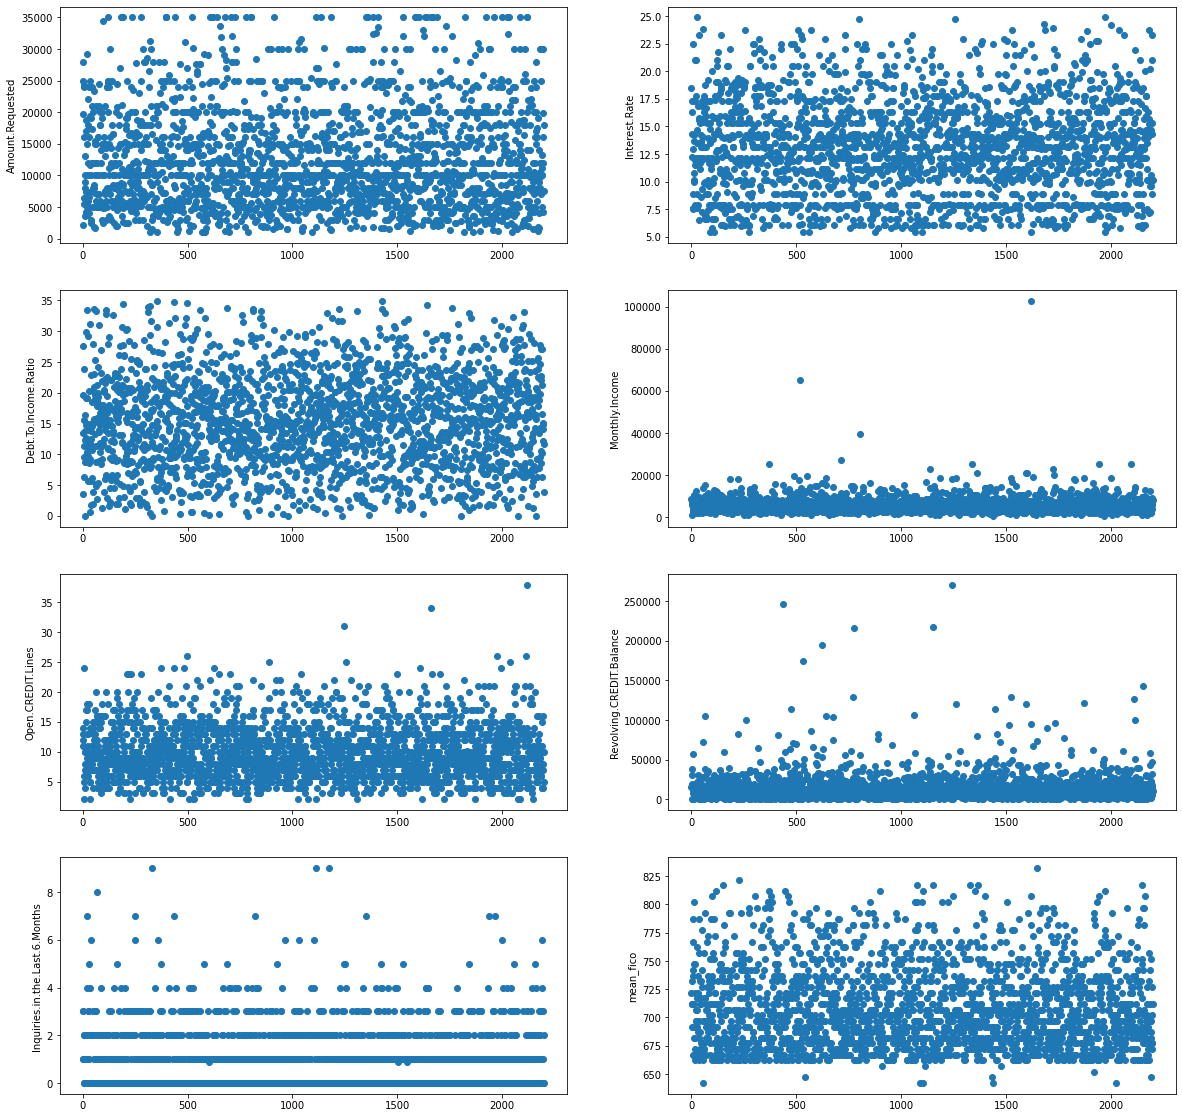

In [ ]:
###### Finding outliers ##########

#### Visualizing numeric columns ######

genuine_numeric_cols = ['Amount.Requested', 'Interest.Rate', 'Debt.To.Income.Ratio',
                        'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
                        'Inquiries.in.the.Last.6.Months', 'mean_fico']

numeric_cols = ld_all.loc[ld_all['data']=='train',genuine_numeric_cols] ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 4
plot_cols = 2

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [ ]:
##### Monthly Income outlier treatment ####

### Lets find it ####

ld_all.loc[(ld_all['data']=='train') & (ld_all['Monthly.Income']>80000),:]

######   #####

ld_all.drop([1621],axis=0,inplace=True)

#ld_all.loc[ld_all['Monthly.Income']>40000,'Monthly.Income'] = 40000

In [ ]:
###### Open Credit lines outlier treatment ######

#### Lets find it #####

ld_all.loc[(ld_all['data']=='train') & (ld_all['Open.CREDIT.Lines']>35),:]

#### lets remove it #####

ld_all.drop([2117],axis=0,inplace=True)

In [ ]:
###### Revolving Credit Balance ####

#ld_all.loc[ld_all['data']=='train','Revolving.CREDIT.Balance'].quantile(0.99)

ld_all.loc[ld_all['Revolving.CREDIT.Balance']>=150000,'Revolving.CREDIT.Balance'] = 150000

#ld_all.loc[ld_all['data']=='train','Revolving.CREDIT.Balance'].max()

In [ ]:
##### find the correlations ######

#### High corrlation between target variable and features (good thing)
#### High correlation among features (bad) 

numeric_cols.corr() ### features with >0.9 <-0.9 (remove one of these features)

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,mean_fico
Amount.Requested,1.000000,0.329786,0.073062,0.383704,0.194540,0.279690,-0.013960,0.083427
Interest.Rate,0.329786,1.000000,0.177837,0.008216,0.090988,0.061375,0.168741,-0.708394
Debt.To.Income.Ratio,0.073062,0.177837,1.000000,-0.169195,0.368694,0.180310,0.009399,-0.225496
Monthly.Income,0.383704,0.008216,-0.169195,1.000000,0.168197,0.353381,0.037961,0.123186
Open.CREDIT.Lines,0.194540,0.090988,0.368694,0.168197,1.000000,0.285739,0.111292,-0.090654
Revolving.CREDIT.Balance,0.279690,0.061375,0.180310,0.353381,0.285739,1.000000,0.025084,-0.000283
Inquiries.in.the.Last.6.Months,-0.013960,0.168741,0.009399,0.037961,0.111292,0.025084,1.000000,-0.090472
mean_fico,0.083427,-0.708394,-0.225496,0.123186,-0.090654,-0.000283,-0.090472,1.000000


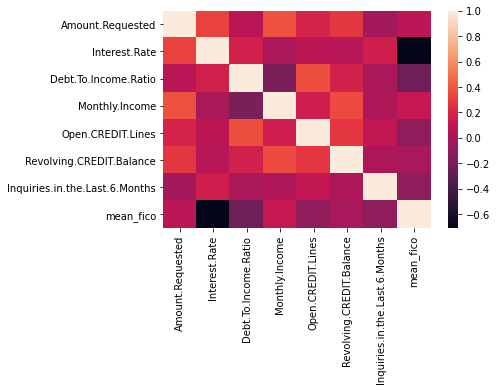

In [ ]:
sns.heatmap(numeric_cols.corr())

In [ ]:
#### Seggregate the train and test back ######

ld_train = ld_all.loc[ld_all['data']=='train']

del ld_train['data']

ld_test = ld_all.loc[ld_all['data']=='test']

ld_test.drop(['Interest.Rate','data'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
del ld_all

In [ ]:
ld_train.shape, ld_test.shape

((2198, 27), (300, 26))

In [ ]:
from sklearn.model_selection import train_test_split ### Help me to split the data into train and validation

In [ ]:
ld_new_train,ld_val = train_test_split(ld_train,test_size=0.2,random_state = 25)

In [ ]:
ld_new_train.shape, ld_val.shape

((1758, 27), (440, 27))

In [ ]:
#### train_features - all columns from the train dataframe except the target column
#### train_targets - the target column from the train set
ld_val

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,mean_fico,loan_period,Loan_purpose_car,Loan_purpose_credit_card,Loan_purpose_debt_consolidation,Loan_purpose_educational,Loan_purpose_home_improvement,Loan_purpose_house,Loan_purpose_major_purchase,Loan_purpose_medical,Loan_purpose_moving,Loan_purpose_other,Loan_purpose_renewable_energy,Loan_purpose_small_business,Loan_purpose_vacation,Loan_purpose_wedding,MORTGAGE,OWN,RENT
1714,7200.0,7.90,7.98,5666.67,5.0,8783.0,0.0,3.0,722.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1005,7000.0,12.42,15.11,7083.33,15.0,16049.0,2.0,10.0,687.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2119,14000.0,9.99,16.84,4583.33,4.0,25.0,0.0,2.0,752.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
977,6000.0,12.12,7.40,5000.00,6.0,14045.0,0.0,2.0,677.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1846,28000.0,19.42,4.56,10813.17,8.0,9397.0,3.0,10.0,687.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,9000.0,6.03,5.87,8333.33,9.0,1717.0,0.0,1.0,777.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1356,25000.0,16.63,18.46,8000.00,11.0,39502.0,0.0,10.0,682.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2121,21850.0,18.79,20.32,4400.00,7.0,9171.0,0.0,4.0,682.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1280,11200.0,7.91,13.07,8500.00,9.0,5439.0,1.0,3.0,722.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Notice that only train data is used for imputing missing values in both train and test 

train_features = ld_new_train.drop('Interest.Rate',axis=1) ## this contains features for train

train_targets = ld_new_train['Interest.Rate'] ### this contains the actual value for train set

val_features = ld_val.drop('Interest.Rate',axis=1) ### this contains features for validation set

val_targets = ld_val['Interest.Rate']  ### this contains validation target

In [ ]:
##### Importing the linear regression function ####

from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression() ## lm is an instance of linearRegression class

In [ ]:
lm.fit(X = train_features,y = train_targets) ### fitting of model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(train_features.columns)

print(lm.coef_)

Index(['Amount.Requested', 'Debt.To.Income.Ratio', 'Monthly.Income',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'mean_fico',
       'loan_period', 'Loan_purpose_car', 'Loan_purpose_credit_card',
       'Loan_purpose_debt_consolidation', 'Loan_purpose_educational',
       'Loan_purpose_home_improvement', 'Loan_purpose_house',
       'Loan_purpose_major_purchase', 'Loan_purpose_medical',
       'Loan_purpose_moving', 'Loan_purpose_other',
       'Loan_purpose_renewable_energy', 'Loan_purpose_small_business',
       'Loan_purpose_vacation', 'Loan_purpose_wedding', 'MORTGAGE', 'OWN',
       'RENT'],
      dtype='object')
[ 1.62611800e-04  2.10005610e-03 -3.91728553e-05 -3.57094777e-02
 -6.52240916e-06  3.35143395e-01  1.20912598e-02 -8.67329733e-02
  3.17808332e+00 -1.23421780e+00 -1.82684278e+00 -1.67641662e+00
 -1.57415504e+00 -1.54988543e+00 -7.67217663e-01 -1.26743002e+00
 -1.55833949e+00 -6.09627513e-02 -8.1171

In [ ]:
lm.intercept_

73.15094360511611

In [ ]:
list(zip(train_features.columns,lm.coef_))

[('Amount.Requested', 0.00016522302080037722),
 ('Debt.To.Income.Ratio', -0.0031977206776649548),
 ('Monthly.Income', -3.9252051522079934e-05),
 ('Open.CREDIT.Lines', -0.04472773489112276),
 ('Revolving.CREDIT.Balance', -3.580144919565486e-06),
 ('Inquiries.in.the.Last.6.Months', 0.367050104389056),
 ('Employment.Length', 0.014638463554837148),
 ('fico', -0.08732543977619801),
 ('loan_period', 3.197868184633709),
 ('car', -1.2506210824697348),
 ('credit_card', -1.7110276803093791),
 ('debt_consolidation', -1.604536603795044),
 ('educational', -1.069971110568462),
 ('home_improvement', -1.5460256377401624),
 ('house', -0.957231986321972),
 ('major_purchase', -1.5960567389873164),
 ('medical', -1.613873448759819),
 ('moving', 0.13337856598072742),
 ('other', -0.5934881418767344),
 ('renewable_energy', -1.5265165469967656),
 ('small_business', -1.2180682843515307),
 ('vacation', -1.4717348157409438),
 ('wedding', -1.9132357444474675),
 ('MORTGAGE', -3.029501728705226),
 ('OWN', -2.7545526

In [ ]:
train_features.shape, val_features.shape

((1758, 26), (440, 26))

In [ ]:
##### Evaluate the performance of the fitted model #####

train_predictions = lm.predict(train_features) ### predict on the train features using the fitted model

val_predictions = lm.predict(val_features) ### predict on the val features using the fitted model

In [ ]:
train_predictions.shape, val_predictions.shape

((1758,), (440,))

In [ ]:
#### Q) Can you tell me some metric that would help me to understand my models performance

#### Average squared error - What is the sq error that my model is making on average
#### MAPE - Mean Absolute percentage error mean(abs((predicted value-actual value))/actual_value) -- On an average what is the percentage error that the model is making [0%-100%]

def MAPE(target_vector, predicted_vector):
  abs_error = np.absolute(target_vector - predicted_vector)
  percent_abs_error = abs_error/target_vector
  mean_abs_percentage_error = np.mean(percent_abs_error)
  return(mean_abs_percentage_error)


In [ ]:
#### Has the model Overfit??? ######

train_MAPE = MAPE(train_targets,train_predictions)

val_MAPE = MAPE(val_targets,val_predictions)

print('Train MAPE : ',train_MAPE)

print('Val MAPE : ',val_MAPE)

### if 13% error is an accepatable error in interest rate predictions-- we would say that the model is perfectly fit

### if 13% error is too much in interest rate predictions- we would say that the model is undefit

Train MAPE :  0.1363118280912679
Val MAPE :  0.1388521654990866


In [ ]:
# q1) Performance metrics for evaluating the model's performance on a regression task.
# Q2) How to do EDA on anygiven dataset/ What are the best practices before building any model.
# q3) How to deal with overfitting in linear regression

In [ ]:
x_train2=ld_train2.drop('Interest.Rate',axis=1)

In [ ]:
predicted_ir=lm.predict(x_train2)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(ld_train2['Interest.Rate'],predicted_ir)

1.6292292194613134

We know the tentative performance now, lets build the model on entire training to make prediction on test/production

In [ ]:
x_train=ld_train.drop('Interest.Rate',axis=1)
y_train=ld_train['Interest.Rate']

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
test_pred=lm.predict(ld_test)

We can write these to a csv file for submission like this :

In [ ]:
pd.DataFrame(test_pred).to_csv("mysubmission.csv",index=False)

# Ridge  Regression

In [ ]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lambdas=np.linspace(1,100,100)

In [ ]:
params={'alpha':lambdas}

In [ ]:
model=Ridge(fit_intercept=True)

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.,   2., ...,  99., 100.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
grid_search.best_estimator_

Ridge(alpha=33.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00389659, 0.00395305, 0.00310287, 0.0030133 , 0.00309932,
        0.00332463, 0.00355682, 0.00349162, 0.00323839, 0.0030251 ,
        0.00351861, 0.00344155, 0.00338409, 0.0030823 , 0.00339909,
        0.0031862 , 0.00307519, 0.00308654, 0.00304551, 0.00301292,
        0.0032419 , 0.00310199, 0.00297008, 0.00308199, 0.003023  ,
        0.00304036, 0.00302777, 0.00302324, 0.00306087, 0.00295475,
        0.00313795, 0.00298152, 0.00303519, 0.00305512, 0.00308578,
        0.00300488, 0.0029736 , 0.00320232, 0.00296652, 0.00305943,
        0.00308428, 0.00308681, 0.00298681, 0.00303648, 0.00305386,
        0.00300529, 0.00298433, 0.0030514 , 0.00298011, 0.00306842,
        0.00307872, 0.00315561, 0.00297823, 0.00311236, 0.00300117,
        0.00308599, 0.0030175 , 0.003227  , 0.00302949, 0.00301442,
        0.00313618, 0.0030612 , 0.00326853, 0.0031441 , 0.00309083,
        0.00312407, 0.0029968 , 0.00303121, 0.00298779, 0.0030575 ,
        0.00307798, 0.00306947,

 if you want you can now fit a ridge regression model with obtained value of alpha , although there is no need, grid search automatically fits the best estimator on the entire data, you can directly use this to make predictions on test_data. But if you want to look at coefficients , its much more convenient to fit the model with direct function

Using the report function given below you can see the cv performance of top few models as well, that will the tentative performance

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
report(grid_search.cv_results_,100)

Model with rank: 1
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 33.0}

Model with rank: 2
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 34.0}

Model with rank: 3
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 32.0}

Model with rank: 4
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 35.0}

Model with rank: 5
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 31.0}

Model with rank: 6
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 36.0}

Model with rank: 7
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 30.0}

Model with rank: 8
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 37.0}

Model with rank: 9
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 29.0}

Model with rank: 10
Mean validation score: -1.610 (std: 0.118)
Parameters: {'alpha': 38.0}

Model with rank: 11
Mean validation score: -1.610 (std: 0.117)
Parameters: {'alpha': 28.0

In [ ]:
test_pred=grid_search.predict(ld_test)

In [ ]:
pd.DataFrame(test_pred).to_csv("mysubmission.csv",index=False)

## For looking at coefficients

In [ ]:
ridge_model=grid_search.best_estimator_

In [ ]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=33.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
list(zip(x_train1.columns,ridge_model.coef_))

[('Amount.Requested', 0.00016694728491458574),
 ('Debt.To.Income.Ratio', -0.0012318165592272907),
 ('Monthly.Income', -2.9587459410661463e-05),
 ('Open.CREDIT.Lines', -0.03684445654831713),
 ('Revolving.CREDIT.Balance', -3.0298763520014893e-06),
 ('Inquiries.in.the.Last.6.Months', 0.34256440527076826),
 ('Employment.Length', 0.019386236424857747),
 ('fico', -0.08664708940339345),
 ('Loan.Length_36 months', -2.839153915719449),
 ('Loan.Purpose_debt_consolidation', -0.3722442958038135),
 ('Loan.Purpose_credit_card', -0.4669643121927737),
 ('Loan.Purpose_other', 0.3782673033850637),
 ('Loan.Purpose_home_improvement', -0.23409022842016233),
 ('Loan.Purpose_major_purchase', -0.013616976256590956),
 ('Loan.Purpose_small_business', 0.08759197675127364),
 ('Loan.Purpose_car', -0.032575531032440215),
 ('Loan.Purpose_wedding', -0.3347599518867083),
 ('Loan.Purpose_medical', -0.09809622633427488),
 ('Loan.Purpose_moving', 0.4641889033639951),
 ('State_CA', -0.09953195660418684),
 ('State_NY', -0.

## Lasso Regression

In [ ]:
lambdas=np.linspace(1,10,100)
model=Lasso(fit_intercept=True)
params={'alpha':lambdas}

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 1.     ,  1.09091, ...,  9.90909, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
grid_search.best_estimator_

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

you can see that, the best value of alpha comes at the edge of the range that we tried , we should expand the trial range on that side and run this again

In [ ]:
lambdas=np.linspace(.001,2,100)
params={'alpha':lambdas}

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 2.11919e-02, ..., 1.97981e+00, 2.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [ ]:
grid_search.best_estimator_

Lasso(alpha=0.021191919191919192, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1.603 (std: 0.120)
Parameters: {'alpha': 0.021191919191919192}

Model with rank: 2
Mean validation score: -1.612 (std: 0.126)
Parameters: {'alpha': 0.041383838383838384}

Model with rank: 3
Mean validation score: -1.615 (std: 0.116)
Parameters: {'alpha': 0.001}

Model with rank: 4
Mean validation score: -1.619 (std: 0.127)
Parameters: {'alpha': 0.061575757575757575}

Model with rank: 5
Mean validation score: -1.624 (std: 0.128)
Parameters: {'alpha': 0.08176767676767677}



In [ ]:
lasso_model=grid_search.best_estimator_

In [ ]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.021191919191919192, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
list(zip(x_train.columns,lasso_model.coef_))

[('Amount.Requested', 0.00016025576388069371),
 ('Debt.To.Income.Ratio', -0.0009940455335086503),
 ('Monthly.Income', -2.7161150694601467e-05),
 ('Open.CREDIT.Lines', -0.037760669422682545),
 ('Revolving.CREDIT.Balance', -3.2291582902347895e-06),
 ('Inquiries.in.the.Last.6.Months', 0.32734647665538585),
 ('Employment.Length', 0.011883001638602725),
 ('fico', -0.08647817945138424),
 ('Loan.Length_36 months', -3.0098932744846625),
 ('Loan.Purpose_debt_consolidation', -0.17801822304251194),
 ('Loan.Purpose_credit_card', -0.2205326921338361),
 ('Loan.Purpose_other', 0.3196217853383158),
 ('Loan.Purpose_home_improvement', -0.0),
 ('Loan.Purpose_major_purchase', 0.0),
 ('Loan.Purpose_small_business', 0.0),
 ('Loan.Purpose_car', 0.0),
 ('Loan.Purpose_wedding', -0.0),
 ('Loan.Purpose_medical', -0.0),
 ('Loan.Purpose_moving', 0.0),
 ('State_CA', -0.0),
 ('State_NY', 0.0),
 ('State_TX', 0.2592516325019151),
 ('State_FL', 0.0),
 ('State_IL', -0.0),
 ('State_GA', -0.0),
 ('State_PA', -0.0),
 ('Sta

# Logistic Regression

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_file=r'~/Dropbox/0.0 Data/rg_train.csv'
test_file=r'~/Dropbox/0.0 Data/rg_test.csv'
bd_train=pd.read_csv(train_file)

bd_test=pd.read_csv(test_file)


bd_test['Revenue.Grid']=np.nan
bd_train['data']='train'
bd_test['data']='test'
bd_test=bd_test[bd_train.columns]
bd_all=pd.concat([bd_train,bd_test],axis=0)

In [ ]:
bd_all['Revenue.Grid'].value_counts()

In [ ]:
list(zip(bd_all.columns,bd_all.dtypes,bd_all.nunique()))

In [ ]:
# REF_NO,post_code , post_area  : drop 
# children : Zero : 0 , 4+ : 4 and then convert to numeric
# age_band : dummies 
# status , occupation , occupation_partner , home_status,family_income : dummies
# self_employed, ` : dummies
# TVArea , Region , gender : dummies
# Revenue Grid : 1,2 : 1,0

In [ ]:
bd_all.drop(['REF_NO','post_code','post_area'],axis=1,inplace=True)

In [ ]:
bd_all['children']=np.where(bd_all['children']=='Zero',0,bd_all['children'])
bd_all['children']=np.where(bd_all['children'][:1]=='4',4,bd_all['children'])
bd_all['children']=pd.to_numeric(bd_all['children'],errors='coerce')

In [ ]:
bd_all['Revenue.Grid']=(bd_all['Revenue.Grid']==1).astype(int)

In [ ]:
cat_vars=bd_all.select_dtypes(['object']).columns

cat_vars

In [ ]:
for col in cat_vars[:-1]:
    dummy=pd.get_dummies(bd_all[col],drop_first=True,prefix=col)
    bd_all=pd.concat([bd_all,dummy],axis=1)
    del bd_all[col]
    print(col)
del dummy

In [ ]:
bd_all.shape

In [ ]:
bd_all.isnull().sum()

In [ ]:
bd_all.loc[bd_all['children'].isnull(),'children']=bd_all.loc[bd_all['data']=='train','children'].mean()


In [ ]:
bd_train=bd_all[bd_all['data']=='train']
del bd_train['data']
bd_test=bd_all[bd_all['data']=='test']
bd_test.drop(['Revenue.Grid','data'],axis=1,inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':np.linspace(0.01,1000,10)}

In [ ]:
model=LogisticRegression(fit_intercept=True)

In [ ]:
grid_search=GridSearchCV(model,param_grid=params,cv=5,scoring="roc_auc")

In [ ]:
x_train=bd_train.drop('Revenue.Grid',axis=1)
y_train=bd_train['Revenue.Grid']

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
logr=grid_search.best_estimator_

In [ ]:
report(grid_search.cv_results_,5)

In [ ]:
logr.fit(x_train,y_train)

In [ ]:
cutoffs=np.linspace(0.01,0.99,99)

cutoffs

In [ ]:
train_score=logr.predict_proba(x_train)[:,1]

real=y_train

In [ ]:
train_score>0.2

In [ ]:
KS_all=[]

for cutoff in cutoffs:
    
    predicted=(train_score>cutoff).astype(int)

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
      
    KS=(TP/P)-(FP/N)
    
    
    KS_all.append(KS)

# try out what cutoffs you get when you use F_beta scores with different values of betas [0.5 , 5]
# beta < 1 : you will get cutoff , which is high ( favours precision)
# beta > 1 : you will get cutoff , which is low (favours precision )

In [ ]:
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

In [ ]:
logr.intercept_

In [ ]:
list(zip(x_train.columns,logr.coef_[0]))

if you simply had to submit probability scores , you could do this 

In [ ]:
test_score=logr.predict_proba(bd_test)[:,1]
pd.DataFrame(test_score).to_csv("mysubmission.csv",index=False)

if you had to submit hardclasses , you can apply the cutoff obtained above and then submit

In [ ]:
test_classes=(test_score>mycutoff).astype(int)

In [ ]:
pd.DataFrame(test_classes).to_csv("mysubmission.csv",index=False)